# Converting a BGR image to Grayscale

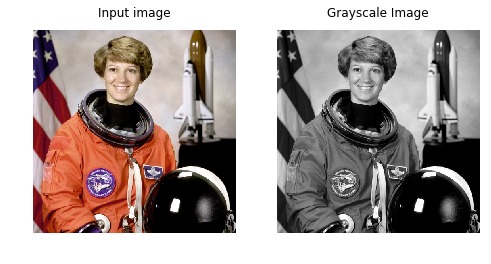

In [3]:
import cv2
from matplotlib import pyplot as plt 
from skimage import data, exposure
image = data.astronaut()

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots


image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(image_gray, cmap=plt.cm.gray)
ax2.set_title('Grayscale Image')
plt.show()


## Filtering

Just like one dimensional signals, images can also be filtered using various kinds of low pass filters or high pass filters. A low pass filter blurs the image and helps in removing noise. On the other hand a high pass filter is used to find edges in an image


## Convolution

For a filter H of size (2k+1)x(2k+1) convo

lved with an image F to give image G:

\begin{equation} 
G\big[ i,j \big] = \sum_{u=-k} ^{k} \sum_{v = -k} ^k H\big[u,v\big] F\big[x+u,y+v \big]
\end{equation}

This is technically correlation but it is loosely called convolution.

Let our input image be F which we want to convolve with say a 3x3 filter H. What we do is first place our filter on one corner of the image F such that it overlaps with the 9 pixels in that corner. 
We now multiply the corresponding values of the filter and the pixels it overlaps with and then sum it up. We then replace the center of the pixels of the image which the filter overlaps with the calculated sum. We now move our filter to right by one pixel and repeat the process.

We will demonstrate this with the following filter kernel: 

\begin{equation}
K = \frac{1}{25}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1\\ 
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
\end{bmatrix}
\end{equation}

This is a 5x5 averaging filter. It will replace the center of the kernel with the average of the 25 pixels below it.

OpenCV has a function cv2.filter2D() to convolve a kernel with an image. Let's see the effect of convolving an image with this kernel.

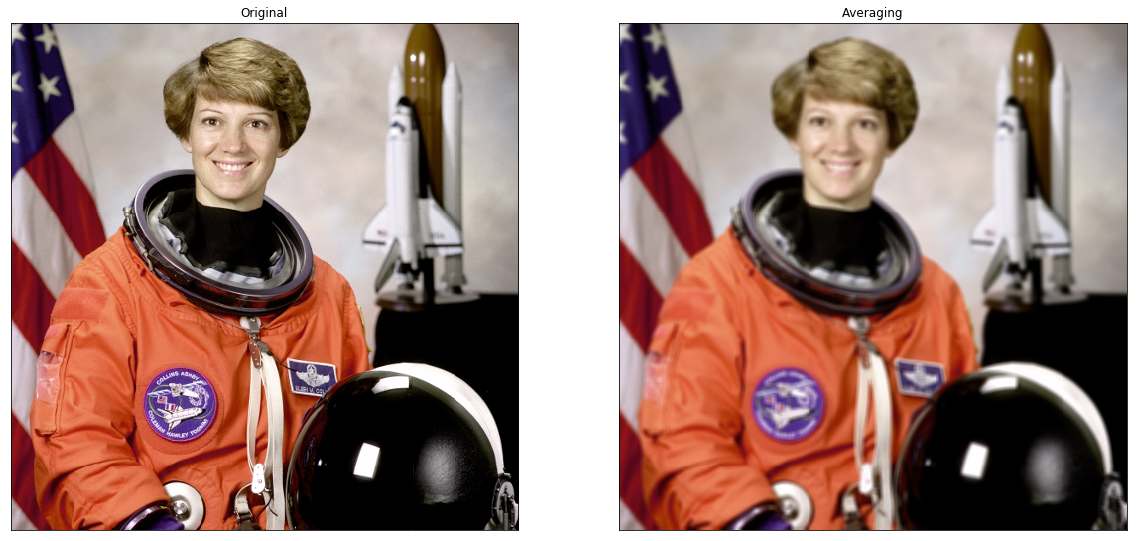

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = data.astronaut()
kernel = np.ones((5,5),np.float32)/25 #Creating the normalised kernel
dst = cv2.filter2D(img,-1,kernel) #Perform the convolution

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Edge Detection

In this section we will show how to find edges in an image. Edges are points of rapid change (high gradient). High pass filters are usually used to find edges in an image. 

## Sobel operator

Sobel operator is a joint Gaussian smoothing and differential operator. It is more resistant to noise. There are two sobel operators: one for finding the horizontal derivatives and one for finding the vertical derivatives. 

For horizontal derivatives: 
\begin{equation}
\frac{1}{8}
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
\end{equation}

For vertical derivatives:
\begin{equation}
\frac{1}{8}
\begin{bmatrix}
1 & 2 & 1\\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
\end{equation}

In [5]:
img_2 = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

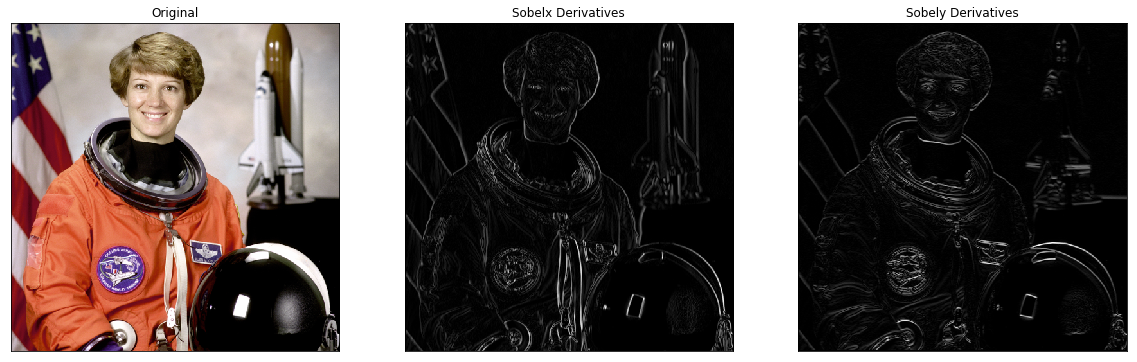

In [6]:
sobelx = cv2.Sobel(img_2,cv2.CV_64F,1,0,ksize = 3)
#Second parameter in the above function is the output datatype. It is a float so that we consider both positive and negative derivatives
#The third and fourth parameter indicate that we are finding horizontal gradients; pass 0,1 to find vertical gradients
#The fifth argument is the size of kernel. Here we are using a 3x3 kernel which is the same one mentioned previously

sobelx = np.absolute(sobelx) #So that even negative gradients can be displayed in the output image

sobely = cv2.Sobel(img_2,cv2.CV_64F,0,1,ksize = 3)

sobely = np.absolute(sobely)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobelx Derivatives'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely, cmap = 'gray')
plt.title('Sobely Derivatives'), plt.xticks([]), plt.yticks([])
plt.show()
plt.show()


# Histogram of Oriented Gradients

In [7]:
import cv2

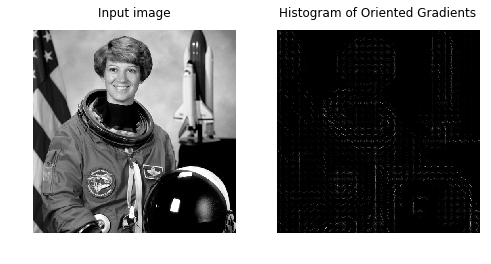

In [8]:
# Example to show the case when the visualize variable is set to True
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

image = data.astronaut()

image_gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

# img = np.ndarray([image.shape[0],image.shape[1]],1)

fd, hog_image = hog(image_gray,9, (16, 16),(1, 1), 'L2-Hys',True,True,True,None)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# result = 1*hog_image_rescaled
hog_image_rescaled = hog_image_rescaled*255

result = 0.001*image_gray + 0.08*hog_image_rescaled

# plt.imshow("map",result)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

# Hands on training your own Neural Network on MNIST dataset

MNIST dataset consists of 50000 handwritten digit images. We are going to use this data to train our own Neural Network to identify handwritten digits.

In [9]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.3162 - acc: 0.9021 - val_loss: 0.1372 - val_acc: 0.9569
Epoch 2/12
60000/60000 [==============================] - 2s 33us/step - loss: 0.1193 - acc: 0.9634 - val_loss: 0.1071 - val_acc: 0.9662
Epoch 3/12
60000/60000 [==============================] - 2s 32us/step - loss: 0.0848 - acc: 0.9741 - val_loss: 0.1014 - val_acc: 0.9700
Epoch 4/12
60000/60000 [==============================] - 2s 33us/step - loss: 0.0633 - acc: 0.9804 - val_loss: 0.0822 - val_acc: 0.9756
Epoch 5/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0487 - acc: 0.9846 - val_loss: 0.0756 - val_acc: 0.9772
Epoch 6/12
60000/60000 [==============================] - 2s 33us/step - loss: 0.0378 - acc: 0.9883 - val_loss: 0.0887 - val_acc: 0.9730
Epoch 7/12
60000/60000 [==============================]